##  第一次接触机器学习，目前还在学习，此代码是听卿老师讲解之后，按照卿老师的程序，抄写的程序，正在努力学习中（jupyter notebook用法也需学习一下）

In [9]:
# 导入必要的工具包
# 数据读取及基本处理
import numpy as np
import pandas as pd
#模型
from sklearn.linear_model import LinearRegression,RidgeCV,LassoCV,ElasticNetCV
#模型评估
from sklearn.metrics import mean_squared_error
from sklearn.metrics import  r2_score        #评价回归预测模型的性能
#图形可视化
import matplotlib.pyplot as plt

In [10]:
#读入数据
data = pd.read_csv("FE_day.csv")
print("Shape of dataset::{}".format(data.shape))
data.head()
#print("train : " + str(train.shape))

Shape of dataset::(731, 35)


,instant,season_1,season_2,season_3,season_4,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,...,weekday_5,weekday_6,temp,atemp,hum,windspeed,holiday,workingday,yr,cnt
0,1,1,0,0,0,1,0,0,0,0,...,0,1,0.355170,0.373517,0.828620,0.284606,0,0,0,985
1,2,1,0,0,0,1,0,0,0,0,...,0,0,0.379232,0.360541,0.715771,0.466215,0,0,0,801
2,3,1,0,0,0,1,0,0,0,0,...,0,0,0.171000,0.144830,0.449638,0.465740,0,1,0,1349
3,4,1,0,0,0,1,0,0,0,0,...,0,0,0.175530,0.174649,0.607131,0.284297,0,1,0,1562
4,5,1,0,0,0,1,0,0,0,0,...,0,0,0.209120,0.197158,0.449313,0.339143,0,1,0,1600


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 35 columns):
instant         731 non-null int64
season_1        731 non-null int64
season_2        731 non-null int64
season_3        731 non-null int64
season_4        731 non-null int64
mnth_1          731 non-null int64
mnth_2          731 non-null int64
mnth_3          731 non-null int64
mnth_4          731 non-null int64
mnth_5          731 non-null int64
mnth_6          731 non-null int64
mnth_7          731 non-null int64
mnth_8          731 non-null int64
mnth_9          731 non-null int64
mnth_10         731 non-null int64
mnth_11         731 non-null int64
mnth_12         731 non-null int64
weathersit_1    731 non-null int64
weathersit_2    731 non-null int64
weathersit_3    731 non-null int64
weekday_0       731 non-null int64
weekday_1       731 non-null int64
weekday_2       731 non-null int64
weekday_3       731 non-null int64
weekday_4       731 non-null int64
weekday_5       731 

## 准备训练数据 

In [12]:
# get labels
y = data['cnt']   
X = data.drop(['cnt'], axis=1)

## 随机分割训练数据和测试数据 

In [13]:
# 用train_test_split 分割训练数据和测试数据
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('train_samples',X_train.shape)

train_samples (584, 34)


In [14]:
#保存测试ID，用于结果提交
testID = X_test['instant']

#ID不参与预测
X_train.drop(['instant'], axis=1, inplace = True)
X_test.drop(['instant'], axis=1, inplace = True)

#保存特征名字以备后用（可视化）
feat_names = X_train.columns

d:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


## 1* Linear Regression without regularization**
最小二乘线性回归，
最小二乘没有超参数需要调优，直接用全体训练数据训练模型

In [15]:
# Linear Regression
# 1. 生成学习器实例
lr = LinearRegression()                 #模型初始化
#2. 在训练集上训练学习器
lr.fit(X_train, y_train)                #训练模型参数
#3.用训练好的学习器对训练集/测试集进行预测
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)


rmse_train=np.sqrt(mean_squared_error(y_train,y_train_pred ))
rmse_test=np.sqrt(mean_squared_error(y_test,y_test_pred ))


print('RMSE_train',rmse_train)
print('RMSE_test',rmse_test)

r2_score_train=r2_score(y_train,y_train_pred)
r2_score_test=r2_score(y_test,y_test_pred)
print('R2_train',r2_score_train)
print('R2_test',r2_score_test)

RMSE_train 752.2641169543666
RMSE_test 785.609115051007
R2_train 0.8436740400232239
R2_test 0.8548880893459053


In [16]:
lr.coef_.shape

(33,)

Ridge picked 33 features and eliminated the other 0 features


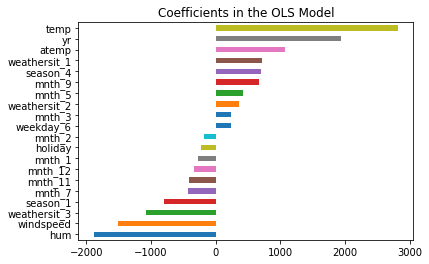

In [17]:
# Plot important coefficients
coefs = pd.Series(lr.coef_, index = feat_names)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")

#正系数值最大的10个特征和负系数值最小（绝对值大）的10个特征
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the OLS Model")
plt.show()

In [18]:
coefs

season_1        -804.648046
season_2          45.685001
season_3          58.091083
season_4         700.871963
mnth_1          -281.064635
mnth_2          -186.423635
mnth_3           238.550050
mnth_4            32.669321
mnth_5           427.121249
mnth_6             4.085997
mnth_7          -429.258837
mnth_8            48.766840
mnth_9           664.025366
mnth_10          215.197270
mnth_11         -405.007739
mnth_12         -328.661246
weathersit_1     718.862651
weathersit_2     361.719092
weathersit_3   -1080.581743
weekday_0       -156.673842
weekday_1       -148.102052
weekday_2        -53.856359
weekday_3         -9.710549
weekday_4         54.375463
weekday_5         78.290168
weekday_6        235.677172
temp            2815.801467
atemp           1075.711228
hum            -1884.936243
windspeed      -1512.255103
holiday         -228.903987
workingday       149.900657
yr              1938.700434
dtype: float64

### 绝对值后，系数的值非常大。由于特征之间强相关，OLS模型的性能并不好（还需看老师直播理解）

## **2* Linear Regression with Ridge regularization (L2 penalty)**岭回归

In [19]:
#RidgeCV缺省的score是mean squared errors 
# 1. 设置超参数搜索范围，生成学习器实例
# RidgeCV(alphas=(0.1, 1.0, 10.0), fit_intercept=True, normalize=False, scoring=None, cv=None, gcv_mode=None, store_cv_values=False)
alphas = [0.01, 0.1, 1, 10, 100, 1000]
ridge = RidgeCV(alphas = alphas,store_cv_values=True )

# 2. 用训练数据度模型进行训练
# RidgeCV采用的是广义交叉验证（Generalized Cross-Validation），留一交叉验证（N-折交叉验证）的一种有效实现方式
ridge.fit(X_train, y_train)

#通过交叉验证得到的最佳超参数alpha
alpha = ridge.alpha_
print("Best alpha :", alpha)

# 交叉验证估计的测试误差
mse_cv = np.mean(ridge.cv_values_, axis = 0)
rmse_cv = np.sqrt(mse_cv)
print("cv of rmse :",rmse_cv)

#训练上测试，训练误差，实际任务中这一步不需要
y_train_pred = ridge.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train,y_train_pred))

y_test_pred = ridge.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test,y_test_pred))

print("RMSE on Training set :", rmse_train)
print("RMSE on Test set :" ,rmse_test)

r2_score_train = r2_score(y_train,y_train_pred)
r2_score_test = r2_score(y_test,y_test_pred)
print("r2_score on Training set :" ,r2_score_train)
print("r2_score on Test set :" ,r2_score_test)

Best alpha : 1.0
cv of rmse : [ 804.98946948  801.06246694  797.95313648  822.15888399 1078.04194503
 1680.07803178]
RMSE on Training set : 754.0366623762021
RMSE on Test set : 776.9753607133543
r2_score on Training set : 0.842936476406777
r2_score on Test set : 0.858060089687772


Ridge picked 33 features and eliminated the other 0 features


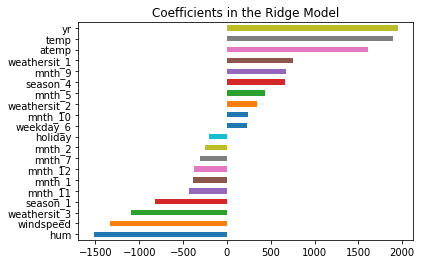

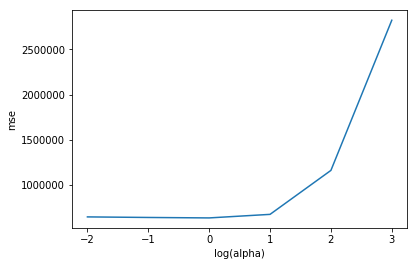

In [20]:
# Plot important coefficients
coefs = pd.Series(ridge.coef_, index = feat_names)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")

#正系数值最大的10个特征和负系数值最小（绝对值大）的10个特征
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()

mse_mean = np.mean(ridge.cv_values_, axis = 0)
plt.plot(np.log10(alphas), mse_mean.reshape(len(alphas),1)) 

plt.xlabel('log(alpha)')
plt.ylabel('mse')
plt.show()

In [21]:
coefs

season_1        -816.946054
season_2          61.439057
season_3          97.124573
season_4         658.382424
mnth_1          -384.604861
mnth_2          -255.398769
mnth_3           185.553801
mnth_4            -6.012570
mnth_5           437.523845
mnth_6           104.170972
mnth_7          -307.981162
mnth_8           129.351248
mnth_9           670.800620
mnth_10          235.474439
mnth_11         -428.094512
mnth_12         -380.783051
weathersit_1     757.284463
weathersit_2     341.945472
weathersit_3   -1099.229935
weekday_0       -166.919676
weekday_1       -155.850725
weekday_2        -48.116950
weekday_3         -4.759450
weekday_4         64.295894
weekday_5         87.446625
weekday_6        223.904283
temp            1892.310062
atemp           1605.349484
hum            -1520.738791
windspeed      -1336.567102
holiday         -202.590794
workingday       145.606188
yr              1952.328786
dtype: float64

### 相比于之前的OLS，岭回归模型增加了L2正则，系数值进行了收缩。 由于增加正则限制了模型复杂的，相比OLS模型，岭回归模型在训练集上的误差略有增大，但在测试集上的误差有所减小。

### 3* Linear Regression with Lasso regularization (L1 penalty)**  Lasso模型

d:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best alpha : 2.336453166053946
cv of rmse : 828.5550460506798
Lasso picked 27 features and eliminated the other 6 features


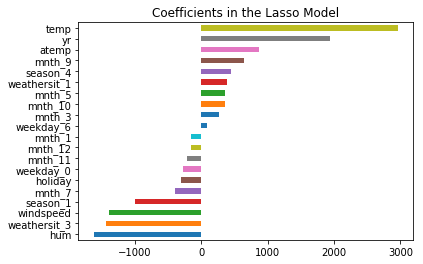

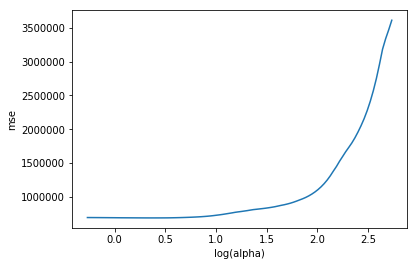

RMSE on Training set : 754.2656275844785
RMSE on Test set : 786.6230585764281
r2_score on Training set : 0.8428410764237866
r2_score on Test set : 0.8545132713117076


In [22]:
# 3* Lasso
#1. 生成学习器实例，LassoCV默认参数可自动确定alpha的搜素范围
lasso = LassoCV()

#2.模型训练
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :" , alpha)

#3. 模型性能：cv
mse_cv = np.mean(lasso.mse_path_, axis = 1)
rmse_cv = np.sqrt(mse_cv)
print("cv of rmse :", min(rmse_cv))

# 4. 特征重要性
#Plot important coefficients
coefs = pd.Series(lasso.coef_, index = feat_names)
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

#5. 显示不同alpha对应的模型性能
plt.plot(np.log10(lasso.alphas_), mse_cv) 

plt.xlabel('log(alpha)')
plt.ylabel('mse')
plt.show() 

#训练误差
y_train_pred = lasso.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train,y_train_pred))
print("RMSE on Training set :" ,rmse_train)

#测试误差
y_test_pred = lasso.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test,y_test_pred))
print("RMSE on Test set :" ,rmse_test)

r2_score_train = r2_score(y_train,y_train_pred)
r2_score_test = r2_score(y_test,y_test_pred)
print("r2_score on Training set :" , r2_score_train)
print("r2_score on Test set :" , r2_score_test)

In [23]:
coefs

season_1        -991.864539
season_2          -0.000000
season_3           0.000000
season_4         448.139977
mnth_1          -152.357646
mnth_2           -46.677131
mnth_3           272.393334
mnth_4            -0.000000
mnth_5           364.227409
mnth_6             0.000000
mnth_7          -395.772042
mnth_8            10.784305
mnth_9           641.369561
mnth_10          352.506349
mnth_11         -209.768543
mnth_12         -153.539040
weathersit_1     388.138775
weathersit_2      -0.000000
weathersit_3   -1429.882687
weekday_0       -273.619964
weekday_1       -134.265169
weekday_2        -22.758843
weekday_3         -0.000000
weekday_4         47.064979
weekday_5         77.322211
weekday_6         82.220008
temp            2964.600668
atemp            863.906434
hum            -1618.968372
windspeed      -1382.149139
holiday         -301.586913
workingday         1.389914
yr              1941.529523
dtype: float64

### Lasso模型增加了L1正则，系数值进行了收缩，同时有些特征的系数为0。 在这个例子中，岭回归模型比Lasso模型性能稍好。（还需要注意下正则超参数调优）

# 总体来说，可能岭回归模型更好一些，

## 对测试集进行测试，生成提交文件

In [24]:
y_test_pred = ridge.predict(X_test)

#生成提交测试结果
df = pd.DataFrame({"instant":testID, 'cnt':y_test_pred})
df.to_csv('submission.csv')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 196 to 239
Data columns (total 2 columns):
instant    147 non-null int64
cnt        147 non-null float64
dtypes: float64(1), int64(1)
memory usage: 3.4 KB
